In [1]:
import pandas as pd
import geopandas as gpd
import rasterio
import glob
import matplotlib.pyplot as plt
import numpy as np

In [5]:
home = '/global/scratch/users/erin_carroll/SUFHER/'
tif_folder = '/global/scratch/users/erin_carroll/data/tifs/GMUG_/'

gmug = gpd.read_file('/global/scratch/users/erin_carroll/data/spatial_data/gmug').to_crs(32613)

In [6]:
# SBEADMR - S2
plots = pd.read_csv(home+'validation_data/SBEADMR/SBEADMR_plots.csv')
plots = gpd.GeoDataFrame(plots, geometry=gpd.points_from_xy(plots['UTM_E'], plots['UTM_N']), crs='EPSG:32613')

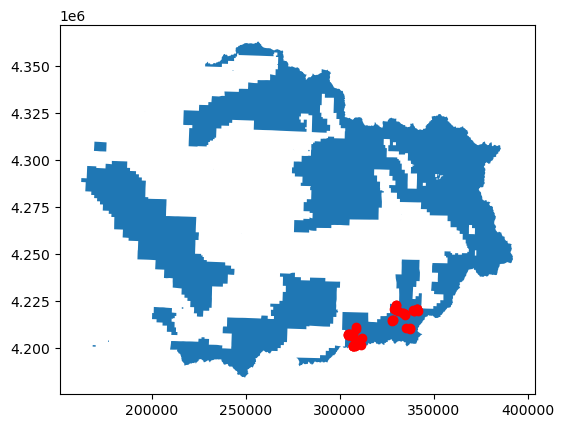

In [7]:
# check that it's in the right spot
fig, ax = plt.subplots()
gmug.plot(ax=ax)
plots.plot(ax=ax, color='red')
plt.show()

In [8]:
plots_12N = plots.to_crs(epsg=32612)
plots_13N = plots.to_crs(epsg=32613)

In [9]:
bands = ['B02','B03','B04','B05','B06','B07','B08','B8A','B11','B12']

In [10]:
tif_fps = [x for x in sorted(glob.glob(tif_folder+'/*/*/*/*_mosaic.tif')) if '0m' not in x]
len(tif_fps)

240

In [11]:
gdfs = []
for tif_fp in tif_fps:
    name = tif_fp.split('/')[-1]
    print(name)
    t = name.split('_')[0]
    y = name.split('_')[1]
    m = name.split('_')[2]

    with rasterio.open(tif_fp) as src:
        if src.crs=='EPSG:32612':
            plots_ = plots_12N.copy()
        else:
            plots_ = plots_13N.copy()
        coords = [(point.x, point.y) for point in plots_.geometry]
        plots_['tmp'] = list(src.sample(coords))
        for b in range(len(bands)):
            plots_[f'{bands[b]}'] = plots_['tmp'].apply(lambda x: x[b] if x is not None else None)
        plots_.drop(columns=['tmp'], inplace=True)
    plots_['tile'] = t
    plots_['year'] = y
    plots_['month'] = m
    gdfs.append(plots_)

12SXH_2017_aug_mosaic.tif
12SXH_2017_jul_mosaic.tif
12SXH_2017_sep_mosaic.tif
12SXH_2018_aug_mosaic.tif
12SXH_2018_jul_mosaic.tif
12SXH_2018_sep_mosaic.tif
12SXH_2019_aug_mosaic.tif
12SXH_2019_jul_mosaic.tif
12SXH_2019_sep_mosaic.tif
12SXH_2020_aug_mosaic.tif
12SXH_2020_jul_mosaic.tif
12SXH_2020_sep_mosaic.tif
12SXH_2021_aug_mosaic.tif
12SXH_2021_jul_mosaic.tif
12SXH_2021_sep_mosaic.tif
12SXH_2022_aug_mosaic.tif
12SXH_2022_jul_mosaic.tif
12SXH_2022_sep_mosaic.tif
12SXH_2023_aug_mosaic.tif
12SXH_2023_jul_mosaic.tif
12SXH_2023_sep_mosaic.tif
12SXH_2024_aug_mosaic.tif
12SXH_2024_jul_mosaic.tif
12SXH_2024_sep_mosaic.tif
12SXJ_2017_aug_mosaic.tif
12SXJ_2017_jul_mosaic.tif
12SXJ_2017_sep_mosaic.tif
12SXJ_2018_aug_mosaic.tif
12SXJ_2018_jul_mosaic.tif
12SXJ_2018_sep_mosaic.tif
12SXJ_2019_aug_mosaic.tif
12SXJ_2019_jul_mosaic.tif
12SXJ_2019_sep_mosaic.tif
12SXJ_2020_aug_mosaic.tif
12SXJ_2020_jul_mosaic.tif
12SXJ_2020_sep_mosaic.tif
12SXJ_2021_aug_mosaic.tif
12SXJ_2021_jul_mosaic.tif
12SXJ_2021_s

In [12]:
plots_spectra = pd.concat(gdfs, ignore_index=True)
plots_spectra

,PLOT_ID,UTM_E,UTM_N,geometry,B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12,tile,year,month
0,CC-109B-CTLP,337130,4210759,POINT (863783.904 4217247.036),0,0,0,0,0,0,0,0,0,0,12SXH,2017,aug
1,CC-41B-CTLP,341503,4219878,POINT (867563.855 4226641.895),0,0,0,0,0,0,0,0,0,0,12SXH,2017,aug
2,CC-98B-CTLP,337097,4210353,POINT (863777.159 4216839.222),0,0,0,0,0,0,0,0,0,0,12SXH,2017,aug
3,DL-29-CTLP,308799,4210459,POINT (835499.635 4215117.548),0,0,0,0,0,0,0,0,0,0,12SXH,2017,aug
4,DL-56-CTLP,308459,4211554,POINT (835089.321 4216189.333),0,0,0,0,0,0,0,0,0,0,12SXH,2017,aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12715,WY-10-CTLP,304746,4207807,POINT (304746.000 4207807.000),0,0,0,0,0,0,0,0,0,0,13SCD,2024,sep
12716,WY-12-CTLP,304381,4207623,POINT (304381.000 4207623.000),0,0,0,0,0,0,0,0,0,0,13SCD,2024,sep
12717,WY-12-PLT,304292,4207067,POINT (304292.000 4207067.000),0,0,0,0,0,0,0,0,0,0,13SCD,2024,sep
12718,WY-2-CTLP,304588,4207446,POINT (304588.000 4207446.000),0,0,0,0,0,0,0,0,0,0,13SCD,2024,sep


In [13]:
plots_spectra[bands] = plots_spectra[bands].replace(0, np.nan)

In [14]:
plots_spectra['NDVI'] = (plots_spectra['B08'] - plots_spectra['B04'])/(plots_spectra['B08'] + plots_spectra['B04'])
plots_spectra['NDMI'] = (plots_spectra['B08'] - plots_spectra['B11'])/(plots_spectra['B08'] + plots_spectra['B11'])

In [15]:
plots_spectra.columns

Index(['PLOT_ID', 'UTM_E', 'UTM_N', 'geometry', 'B02', 'B03', 'B04', 'B05',
       'B06', 'B07', 'B08', 'B8A', 'B11', 'B12', 'tile', 'year', 'month',
       'NDVI', 'NDMI'],
      dtype='object')

In [16]:
# for each ponit, reduce to the values from the tile with the max NDVI

plots_spectra_summary = plots_spectra.loc[
    plots_spectra.groupby(['PLOT_ID', 'year', 'month'])['NDVI'].idxmax(), # get row index with max NDVI
    ['PLOT_ID', 'year', 'month', 'tile', *bands, 'NDVI', 'NDMI']
].reset_index(drop=True)

In [17]:
plots_spectra_summary

,PLOT_ID,year,month,tile,B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12,NDVI,NDMI
0,CC-109B-CTLP,2017,aug,13SCC,1458.0,1580.0,1600.0,1869.0,2495.0,2837.0,2864.0,2978.0,3211.0,2438.0,0.283154,-0.057119
1,CC-109B-CTLP,2017,jul,13SCC,1447.0,1554.0,1600.0,1851.0,2424.0,2679.0,2664.0,2804.0,3275.0,2525.0,0.249531,-0.102879
2,CC-109B-CTLP,2017,sep,13SCC,1471.0,1580.0,1582.0,1835.0,2362.0,2532.0,2542.0,2687.0,2971.0,2321.0,0.232784,-0.077816
3,CC-109B-CTLP,2018,aug,13SCC,1554.0,1636.0,1672.0,1920.0,2471.0,2718.0,2698.0,2868.0,3387.0,2638.0,0.234783,-0.113229
4,CC-109B-CTLP,2018,jul,13SCC,1578.0,1588.0,1615.0,1904.0,2496.0,2882.0,2926.0,3150.0,2736.0,1917.0,0.288703,0.033557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,WY-4-PLT,2023,jul,13SCC,1780.0,1968.0,2160.0,2422.0,2919.0,3116.0,3398.0,3409.0,4464.0,3555.0,0.222742,-0.135589
1268,WY-4-PLT,2023,sep,13SCC,1667.0,1730.0,1964.0,2250.0,2585.0,2799.0,2946.0,3131.0,3336.0,2428.0,0.200000,-0.062082
1269,WY-4-PLT,2024,aug,13SBC,1898.0,2092.0,2310.0,2692.0,3424.0,3747.0,3906.0,4031.0,4824.0,3563.0,0.256757,-0.105155
1270,WY-4-PLT,2024,jul,13SCC,1756.0,1982.0,2104.0,2422.0,3123.0,3313.0,3578.0,3608.0,4455.0,3385.0,0.259416,-0.109175


In [18]:
# export
fp_out = home+'validation_data/SBEADMR/SBEADMR_plots_spectra.csv'
plots_spectra_summary.to_csv(fp_out, index=False)

In [20]:
# add LWC

tif_folder = home+'LWC_predictions/'
tif_fps = sorted(glob.glob(tif_folder+'/*.tif')) # all tiles, because these plots are all over the place
print(tif_fps[0])
len(tif_fps)

/global/scratch/users/erin_carroll/SUFHER/LWC_predictions/prediction_lwc_013024_0_2017_12SXH.tif


80

In [21]:
gdfs = []
for fp in tif_fps:
    name = fp.split('/')[-1].strip('.tif')
    print(name)
    t = name.split('_')[-1]
    y = name.split('_')[-2]
    m = 'jul'

    with rasterio.open(fp) as src:
        if src.crs=='EPSG:32612':
            plots_ = plots_12N.copy()
        else:
            plots_ = plots_13N.copy()
        coords = [(point.x, point.y) for point in plots_.geometry]
        plots_['lwc'] = [x[0] for x in list(src.sample(coords))]
    plots_['tile'] = t
    plots_['year'] = y
    plots_['month'] = m
    gdfs.append(plots_)

prediction_lwc_013024_0_2017_12SXH
prediction_lwc_013024_0_2017_12SXJ
prediction_lwc_013024_0_2017_12SYG
prediction_lwc_013024_0_2017_12SYH
prediction_lwc_013024_0_2017_12SYJ
prediction_lwc_013024_0_2017_13SBB
prediction_lwc_013024_0_2017_13SBC
prediction_lwc_013024_0_2017_13SBD
prediction_lwc_013024_0_2017_13SCC
prediction_lwc_013024_0_2017_13SCD
prediction_lwc_013024_0_2018_12SXH
prediction_lwc_013024_0_2018_12SXJ
prediction_lwc_013024_0_2018_12SYG
prediction_lwc_013024_0_2018_12SYH
prediction_lwc_013024_0_2018_12SYJ
prediction_lwc_013024_0_2018_13SBB
prediction_lwc_013024_0_2018_13SBC
prediction_lwc_013024_0_2018_13SBD
prediction_lwc_013024_0_2018_13SCC
prediction_lwc_013024_0_2018_13SCD
prediction_lwc_013024_0_2019_12SXH
prediction_lwc_013024_0_2019_12SXJ
prediction_lwc_013024_0_2019_12SYG
prediction_lwc_013024_0_2019_12SYH
prediction_lwc_013024_0_2019_12SYJ
prediction_lwc_013024_0_2019_13SBB
prediction_lwc_013024_0_2019_13SBC
prediction_lwc_013024_0_2019_13SBD
prediction_lwc_01302

In [22]:
plots_spectra = pd.concat(gdfs, ignore_index=True)
plots_spectra

,PLOT_ID,UTM_E,UTM_N,geometry,lwc,tile,year,month
0,CC-109B-CTLP,337130,4210759,POINT (863783.904 4217247.036),0.0,12SXH,2017,jul
1,CC-41B-CTLP,341503,4219878,POINT (867563.855 4226641.895),0.0,12SXH,2017,jul
2,CC-98B-CTLP,337097,4210353,POINT (863777.159 4216839.222),0.0,12SXH,2017,jul
3,DL-29-CTLP,308799,4210459,POINT (835499.635 4215117.548),0.0,12SXH,2017,jul
4,DL-56-CTLP,308459,4211554,POINT (835089.321 4216189.333),0.0,12SXH,2017,jul
...,...,...,...,...,...,...,...,...
4235,WY-10-CTLP,304746,4207807,POINT (304746.000 4207807.000),0.0,13SCD,2024,jul
4236,WY-12-CTLP,304381,4207623,POINT (304381.000 4207623.000),0.0,13SCD,2024,jul
4237,WY-12-PLT,304292,4207067,POINT (304292.000 4207067.000),0.0,13SCD,2024,jul
4238,WY-2-CTLP,304588,4207446,POINT (304588.000 4207446.000),0.0,13SCD,2024,jul


In [23]:
plots_spectra['lwc'] = plots_spectra['lwc'].replace(0, np.nan)
plots_spectra

,PLOT_ID,UTM_E,UTM_N,geometry,lwc,tile,year,month
0,CC-109B-CTLP,337130,4210759,POINT (863783.904 4217247.036),NaN,12SXH,2017,jul
1,CC-41B-CTLP,341503,4219878,POINT (867563.855 4226641.895),NaN,12SXH,2017,jul
2,CC-98B-CTLP,337097,4210353,POINT (863777.159 4216839.222),NaN,12SXH,2017,jul
3,DL-29-CTLP,308799,4210459,POINT (835499.635 4215117.548),NaN,12SXH,2017,jul
4,DL-56-CTLP,308459,4211554,POINT (835089.321 4216189.333),NaN,12SXH,2017,jul
...,...,...,...,...,...,...,...,...
4235,WY-10-CTLP,304746,4207807,POINT (304746.000 4207807.000),NaN,13SCD,2024,jul
4236,WY-12-CTLP,304381,4207623,POINT (304381.000 4207623.000),NaN,13SCD,2024,jul
4237,WY-12-PLT,304292,4207067,POINT (304292.000 4207067.000),NaN,13SCD,2024,jul
4238,WY-2-CTLP,304588,4207446,POINT (304588.000 4207446.000),NaN,13SCD,2024,jul


In [24]:
# for each point, reduce to the values from the tile with the max LWC
plots_spectra_lwc = plots_spectra.groupby(['PLOT_ID', 'UTM_N', 'UTM_E', 'year', 'month']).agg({
    'lwc':'max'
}).reset_index()

In [29]:
plots_spectra_lwc['year'] = plots_spectra_lwc['year'].astype(int)

In [35]:
plots_spectra_lwc

,PLOT_ID,UTM_N,UTM_E,year,month,lwc
0,CC-109B-CTLP,4210759,337130,2017,jul,141256.171875
1,CC-109B-CTLP,4210759,337130,2018,jul,292385.031250
2,CC-109B-CTLP,4210759,337130,2019,jul,173837.265625
3,CC-109B-CTLP,4210759,337130,2020,jul,142265.921875
4,CC-109B-CTLP,4210759,337130,2021,jul,199099.703125
...,...,...,...,...,...,...
419,WY-4-PLT,4206856,304428,2020,jul,154436.812500
420,WY-4-PLT,4206856,304428,2021,jul,197050.718750
421,WY-4-PLT,4206856,304428,2022,jul,379445.718750
422,WY-4-PLT,4206856,304428,2023,jul,128450.828125


In [36]:
# join to other plots_spectra data (ndvi, ndmi)
plots_spectra = pd.read_csv(home+'validation_data/SBEADMR/SBEADMR_plots_spectra.csv')
plots_spectra

,PLOT_ID,year,month,tile,B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12,NDVI,NDMI
0,CC-109B-CTLP,2017,aug,13SCC,1458.0,1580.0,1600.0,1869.0,2495.0,2837.0,2864.0,2978.0,3211.0,2438.0,0.283154,-0.057119
1,CC-109B-CTLP,2017,jul,13SCC,1447.0,1554.0,1600.0,1851.0,2424.0,2679.0,2664.0,2804.0,3275.0,2525.0,0.249531,-0.102879
2,CC-109B-CTLP,2017,sep,13SCC,1471.0,1580.0,1582.0,1835.0,2362.0,2532.0,2542.0,2687.0,2971.0,2321.0,0.232784,-0.077816
3,CC-109B-CTLP,2018,aug,13SCC,1554.0,1636.0,1672.0,1920.0,2471.0,2718.0,2698.0,2868.0,3387.0,2638.0,0.234783,-0.113229
4,CC-109B-CTLP,2018,jul,13SCC,1578.0,1588.0,1615.0,1904.0,2496.0,2882.0,2926.0,3150.0,2736.0,1917.0,0.288703,0.033557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,WY-4-PLT,2023,jul,13SCC,1780.0,1968.0,2160.0,2422.0,2919.0,3116.0,3398.0,3409.0,4464.0,3555.0,0.222742,-0.135589
1268,WY-4-PLT,2023,sep,13SCC,1667.0,1730.0,1964.0,2250.0,2585.0,2799.0,2946.0,3131.0,3336.0,2428.0,0.200000,-0.062082
1269,WY-4-PLT,2024,aug,13SBC,1898.0,2092.0,2310.0,2692.0,3424.0,3747.0,3906.0,4031.0,4824.0,3563.0,0.256757,-0.105155
1270,WY-4-PLT,2024,jul,13SCC,1756.0,1982.0,2104.0,2422.0,3123.0,3313.0,3578.0,3608.0,4455.0,3385.0,0.259416,-0.109175


In [37]:
plots_spectra = pd.merge(plots_spectra, plots_spectra_lwc, on=['PLOT_ID', 'year', 'month'], how='left')

In [38]:
plots_spectra

,PLOT_ID,year,month,tile,B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12,NDVI,NDMI,UTM_N,UTM_E,lwc
0,CC-109B-CTLP,2017,aug,13SCC,1458.0,1580.0,1600.0,1869.0,2495.0,2837.0,2864.0,2978.0,3211.0,2438.0,0.283154,-0.057119,NaN,NaN,NaN
1,CC-109B-CTLP,2017,jul,13SCC,1447.0,1554.0,1600.0,1851.0,2424.0,2679.0,2664.0,2804.0,3275.0,2525.0,0.249531,-0.102879,4210759.0,337130.0,141256.171875
2,CC-109B-CTLP,2017,sep,13SCC,1471.0,1580.0,1582.0,1835.0,2362.0,2532.0,2542.0,2687.0,2971.0,2321.0,0.232784,-0.077816,NaN,NaN,NaN
3,CC-109B-CTLP,2018,aug,13SCC,1554.0,1636.0,1672.0,1920.0,2471.0,2718.0,2698.0,2868.0,3387.0,2638.0,0.234783,-0.113229,NaN,NaN,NaN
4,CC-109B-CTLP,2018,jul,13SCC,1578.0,1588.0,1615.0,1904.0,2496.0,2882.0,2926.0,3150.0,2736.0,1917.0,0.288703,0.033557,4210759.0,337130.0,292385.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,WY-4-PLT,2023,jul,13SCC,1780.0,1968.0,2160.0,2422.0,2919.0,3116.0,3398.0,3409.0,4464.0,3555.0,0.222742,-0.135589,4206856.0,304428.0,128450.828125
1268,WY-4-PLT,2023,sep,13SCC,1667.0,1730.0,1964.0,2250.0,2585.0,2799.0,2946.0,3131.0,3336.0,2428.0,0.200000,-0.062082,NaN,NaN,NaN
1269,WY-4-PLT,2024,aug,13SBC,1898.0,2092.0,2310.0,2692.0,3424.0,3747.0,3906.0,4031.0,4824.0,3563.0,0.256757,-0.105155,NaN,NaN,NaN
1270,WY-4-PLT,2024,jul,13SCC,1756.0,1982.0,2104.0,2422.0,3123.0,3313.0,3578.0,3608.0,4455.0,3385.0,0.259416,-0.109175,4206856.0,304428.0,215442.078125


In [39]:
# export
fp_out = home+'validation_data/SBEADMR/SBEADMR_plots_spectra.csv'
plots_spectra.to_csv(fp_out, index=False)